In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

/home/chandrahas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load the data 
cifar10 = tf.keras.datasets.cifar10

In [3]:
# load the test and training data into seperate variables
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
# normalizing
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
# Lets calculate f1 score

# Formula for f score is ----> F(β)=(1+β^2)⋅(PR/(ββP+R))

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 2 * precision * recall / (precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

Changing the plateform from google collab to jupyter notebook.
Lets see cross validation now.

In [6]:
from sklearn.model_selection import StratifiedKFold

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []
i = 1
for train, test in kfold.split(x_train, y_train):
    # create model
    model_2_cv = tf.keras.models.Sequential()
    model_2_cv.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
    model_2_cv.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
    model_2_cv.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
    model_2_cv.add(tf.keras.layers.Dense(48, activation=tf.nn.relu))
    model_2_cv.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    
    # Compile model
    model_2_cv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy',f1_score])
    
    # Fit the model
    model_2_cv.fit(x_train[train], y_train[train], epochs=30)
    
    # evaluate the model
    scores = model_2_cv.evaluate(x_train[test], y_train[test])
    
    #print(model_2_cv.metrics_names[1], scores[1]*100)
    print('Accuracy of iteration {} is {}'.format(i,scores[1]*100))
    cvscores.append(scores[1] * 100)
    i += 1

print('Mean of all the accuracies is {}'.format(np.mean(cvscores)))

Epoch 1/30
45000/45000 [==============================] - 14s 321us/step - loss: 2.0872 - acc: 0.2306 - f1_score: 0.0418
Epoch 2/30
45000/45000 [==============================] - 14s 309us/step - loss: 1.8919 - acc: 0.3205 - f1_score: 0.1546
Epoch 3/30
45000/45000 [==============================] - 14s 310us/step - loss: 1.8157 - acc: 0.3496 - f1_score: 0.2070
Epoch 4/30
45000/45000 [==============================] - 14s 317us/step - loss: 1.7652 - acc: 0.3694 - f1_score: 0.2495
Epoch 5/30
45000/45000 [==============================] - 14s 312us/step - loss: 1.7232 - acc: 0.3840 - f1_score: 0.2890
Epoch 6/30
45000/45000 [==============================] - 14s 315us/step - loss: 1.6855 - acc: 0.3990 - f1_score: 0.3224
Epoch 7/30
45000/45000 [==============================] - 15s 326us/step - loss: 1.6613 - acc: 0.4054 - f1_score: 0.3445
Epoch 8/30
45000/45000 [==============================] - 15s 325us/step - loss: 1.6320 - acc: 0.4174 - f1_score: 0.3737
Epoch 9/30
45000/45000 [========

45000/45000 [==============================] - 13s 291us/step - loss: 1.6848 - acc: 0.3985 - f1_score: 0.3170
Epoch 7/30
45000/45000 [==============================] - 15s 330us/step - loss: 1.6578 - acc: 0.4079 - f1_score: 0.3457
Epoch 8/30
45000/45000 [==============================] - 17s 382us/step - loss: 1.6198 - acc: 0.4237 - f1_score: 0.3828
Epoch 9/30
45000/45000 [==============================] - 15s 341us/step - loss: 1.5968 - acc: 0.4302 - f1_score: 0.3991
Epoch 10/30
45000/45000 [==============================] - 15s 334us/step - loss: 1.5718 - acc: 0.4395 - f1_score: 0.4220
Epoch 11/30
45000/45000 [==============================] - 14s 318us/step - loss: 1.5538 - acc: 0.4446 - f1_score: 0.4438
Epoch 12/30
45000/45000 [==============================] - 14s 314us/step - loss: 1.5292 - acc: 0.4534 - f1_score: 0.4677
Epoch 13/30
45000/45000 [==============================] - 14s 321us/step - loss: 1.5143 - acc: 0.4583 - f1_score: 0.4801
Epoch 14/30
45000/45000 [==============

45000/45000 [==============================] - 13s 286us/step - loss: 1.5446 - acc: 0.4475 - f1_score: 0.4540
Epoch 12/30
45000/45000 [==============================] - 13s 296us/step - loss: 1.5168 - acc: 0.4611 - f1_score: 0.4792
Epoch 13/30
45000/45000 [==============================] - 13s 292us/step - loss: 1.4996 - acc: 0.4662 - f1_score: 0.4999
Epoch 14/30
45000/45000 [==============================] - 13s 285us/step - loss: 1.4730 - acc: 0.4750 - f1_score: 0.5167
Epoch 15/30
45000/45000 [==============================] - 14s 311us/step - loss: 1.4578 - acc: 0.4812 - f1_score: 0.5348
Epoch 16/30
45000/45000 [==============================] - 16s 347us/step - loss: 1.4423 - acc: 0.4871 - f1_score: 0.5452
Epoch 17/30
45000/45000 [==============================] - 15s 325us/step - loss: 1.4240 - acc: 0.4912 - f1_score: 0.5666
Epoch 18/30
45000/45000 [==============================] - 15s 336us/step - loss: 1.4067 - acc: 0.4988 - f1_score: 0.5814
Epoch 19/30
45000/45000 [===========

45000/45000 [==============================] - 16s 352us/step - loss: 1.5128 - acc: 0.4617 - f1_score: 0.4861
Epoch 17/30
45000/45000 [==============================] - 16s 357us/step - loss: 1.5029 - acc: 0.4641 - f1_score: 0.4977
Epoch 18/30
45000/45000 [==============================] - 16s 350us/step - loss: 1.4901 - acc: 0.4702 - f1_score: 0.5085
Epoch 19/30
45000/45000 [==============================] - 25s 558us/step - loss: 1.4806 - acc: 0.4733 - f1_score: 0.5226
Epoch 20/30
45000/45000 [==============================] - 20s 436us/step - loss: 1.4711 - acc: 0.4760 - f1_score: 0.5237
Epoch 21/30
45000/45000 [==============================] - 24s 525us/step - loss: 1.4569 - acc: 0.4814 - f1_score: 0.5385
Epoch 22/30
45000/45000 [==============================] - 257s 6ms/step - loss: 1.4486 - acc: 0.4843 - f1_score: 0.5439
Epoch 23/30
45000/45000 [==============================] - 15s 339us/step - loss: 1.4399 - acc: 0.4861 - f1_score: 0.5555
Epoch 24/30
45000/45000 [============

45000/45000 [==============================] - 16s 365us/step - loss: 1.5370 - acc: 0.4506 - f1_score: 0.4629
Epoch 13/30
45000/45000 [==============================] - 15s 336us/step - loss: 1.5183 - acc: 0.4577 - f1_score: 0.4808
Epoch 14/30
45000/45000 [==============================] - 15s 335us/step - loss: 1.5005 - acc: 0.4650 - f1_score: 0.4964
Epoch 15/30
45000/45000 [==============================] - 16s 351us/step - loss: 1.4831 - acc: 0.4704 - f1_score: 0.5138
Epoch 16/30
45000/45000 [==============================] - 16s 351us/step - loss: 1.4681 - acc: 0.4747 - f1_score: 0.5229
Epoch 17/30
45000/45000 [==============================] - 16s 356us/step - loss: 1.4536 - acc: 0.4812 - f1_score: 0.5406
Epoch 18/30
45000/45000 [==============================] - 16s 347us/step - loss: 1.4414 - acc: 0.4855 - f1_score: 0.5499
Epoch 19/30
45000/45000 [==============================] - 16s 354us/step - loss: 1.4277 - acc: 0.4918 - f1_score: 0.5611
Epoch 20/30
45000/45000 [===========

NameError: name 'np' is not defined

In [16]:
import numpy as np

print('Mean of all the validation accuracies is {}'.format(np.mean(cvscores)))

Mean of all the validation accuracies is 43.59


So as we can see mean of all validation accuracies almost 10% less than training accuracies.

Lets develop another model with multiple layers and lets see the test accuracy and comment on the perfromance improvement.

In [8]:
model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_3.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model_3.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_3.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_3.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model_3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [9]:
model_3.fit(x_train, y_train, epochs=30)

Epoch 1/30
50000/50000 [==============================] - 23s 468us/step - loss: 2.0743 - acc: 0.2316 - f1_score: 0.0431
Epoch 2/30
50000/50000 [==============================] - 23s 454us/step - loss: 1.9194 - acc: 0.3025 - f1_score: 0.1349
Epoch 3/30
50000/50000 [==============================] - 23s 452us/step - loss: 1.8343 - acc: 0.3385 - f1_score: 0.1900
Epoch 4/30
50000/50000 [==============================] - 23s 452us/step - loss: 1.7748 - acc: 0.3615 - f1_score: 0.2375
Epoch 5/30
50000/50000 [==============================] - 23s 451us/step - loss: 1.7303 - acc: 0.3802 - f1_score: 0.2887
Epoch 6/30
50000/50000 [==============================] - 23s 452us/step - loss: 1.6925 - acc: 0.3969 - f1_score: 0.3291
Epoch 7/30
50000/50000 [==============================] - 23s 450us/step - loss: 1.6592 - acc: 0.4073 - f1_score: 0.3562
Epoch 8/30
50000/50000 [==============================] - 23s 450us/step - loss: 1.6338 - acc: 0.4183 - f1_score: 0.3832
Epoch 9/30
50000/50000 [========

In [27]:
# evaluate the out of sample data with model

test_loss, test_acc, test_f1 = model_3.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)
print(test_f1)

10000/10000 [==============================] - 1s 81us/step
1.6815087841033936
0.4427
0.6996402380952383


As you can see that our perfromance has improved by increasing number of layers. Lets modify a few more parameteres and see whether we can improve our performance. Lets play with the learning rate and momentum.

In [12]:
# with different leraning rate, momentum rate and number of neurons
model_4 = tf.keras.models.Sequential()
model_4.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_4.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model_4.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
model_4.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_4.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_4.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_4.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_4.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [14]:
model_4.fit(x_train, y_train, epochs=30)

Epoch 1/30
50000/50000 [==============================] - 15s 296us/step - loss: 2.0207 - acc: 0.2599 - f1_score: 0.0701
Epoch 2/30
50000/50000 [==============================] - 14s 275us/step - loss: 1.8573 - acc: 0.3285 - f1_score: 0.1734
Epoch 3/30
50000/50000 [==============================] - 15s 301us/step - loss: 1.7809 - acc: 0.3587 - f1_score: 0.2381
Epoch 4/30
50000/50000 [==============================] - 15s 293us/step - loss: 1.7185 - acc: 0.3845 - f1_score: 0.2983
Epoch 5/30
50000/50000 [==============================] - 14s 289us/step - loss: 1.6663 - acc: 0.4035 - f1_score: 0.3520
Epoch 6/30
50000/50000 [==============================] - 15s 291us/step - loss: 1.6189 - acc: 0.4195 - f1_score: 0.3931
Epoch 7/30
50000/50000 [==============================] - 15s 303us/step - loss: 1.5863 - acc: 0.4348 - f1_score: 0.4286
Epoch 8/30
50000/50000 [==============================] - 15s 299us/step - loss: 1.5460 - acc: 0.4490 - f1_score: 0.4676
Epoch 9/30
50000/50000 [========

Fanatstic! our f1 score and accuracy is the best we have got so far. Lets see the performnce on test data.

In [26]:
test_loss, test_acc, test_f1 = model_4.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)
print(test_f1)

10000/10000 [==============================] - 1s 82us/step
1.6708386360168457
0.4778
0.8786246825396825


As we can see test accuracy that we have got is also the best until now. However, the difference between training accuracy and Test accuracy has increased. So we can say that we might be overfitting the data or model_4 might be just memorizing the data as there are too many available weights.

Therefore, lets try reducing number layers and see if we can achieve similar results.

In [30]:
# with different leraning rate, momentum rate and reduced number of hidden layers
model_5 = tf.keras.models.Sequential()
model_5.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_5.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model_5.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
model_5.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_5.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_5.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.7, nesterov=True)

model_5.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [31]:
model_5.fit(x_train, y_train, epochs=30)

Epoch 1/30
50000/50000 [==============================] - 14s 283us/step - loss: 2.0822 - acc: 0.2343 - f1_score: 0.0624
Epoch 2/30
50000/50000 [==============================] - 14s 277us/step - loss: 1.9491 - acc: 0.2946 - f1_score: 0.1285
Epoch 3/30
50000/50000 [==============================] - 15s 301us/step - loss: 1.8848 - acc: 0.3231 - f1_score: 0.1714
Epoch 4/30
50000/50000 [==============================] - 17s 330us/step - loss: 1.8328 - acc: 0.3428 - f1_score: 0.2173
Epoch 5/30
50000/50000 [==============================] - 16s 327us/step - loss: 1.7960 - acc: 0.3578 - f1_score: 0.2526
Epoch 6/30
50000/50000 [==============================] - 16s 316us/step - loss: 1.7665 - acc: 0.3701 - f1_score: 0.2775
Epoch 7/30
50000/50000 [==============================] - 14s 288us/step - loss: 1.7426 - acc: 0.3780 - f1_score: 0.3077
Epoch 8/30
50000/50000 [==============================] - 14s 288us/step - loss: 1.7202 - acc: 0.3889 - f1_score: 0.3331
Epoch 9/30
50000/50000 [========

The accuracy of this model is worse than model_4. This could be due to many reasons such as change in the value of learning rate, reduced number of layers or change in the value of momentum. Lets see the effects on the test accuracy.

In [32]:
test_loss, test_acc, test_f1 = model_5.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)
print(test_f1)

10000/10000 [==============================] - 1s 100us/step
1.7802733276367189
0.4002
0.5168532539682541


Ok. model_4 is better than model_5 in terms of both training accuracy as well as test accuracy. So lets go back to model_4 and try to reduce number of layers keeping learning rate and momentum constant and see how it affects the performance.

In [33]:
# with reduced number of hidden layers
model_6 = tf.keras.models.Sequential()
model_6.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_6.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(160, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_6.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [34]:
model_6.fit(x_train, y_train, epochs=30)

Epoch 1/30
50000/50000 [==============================] - 14s 287us/step - loss: 2.0179 - acc: 0.2639 - f1_score: 0.0742
Epoch 2/30
50000/50000 [==============================] - 15s 297us/step - loss: 1.8411 - acc: 0.3359 - f1_score: 0.1779
Epoch 3/30
50000/50000 [==============================] - 15s 293us/step - loss: 1.7630 - acc: 0.3685 - f1_score: 0.2518
Epoch 4/30
50000/50000 [==============================] - 14s 284us/step - loss: 1.7049 - acc: 0.3919 - f1_score: 0.3089
Epoch 5/30
50000/50000 [==============================] - 14s 280us/step - loss: 1.6587 - acc: 0.4085 - f1_score: 0.3565
Epoch 6/30
50000/50000 [==============================] - 14s 288us/step - loss: 1.6174 - acc: 0.4209 - f1_score: 0.3927
Epoch 7/30
50000/50000 [==============================] - 14s 285us/step - loss: 1.5799 - acc: 0.4356 - f1_score: 0.4317
Epoch 8/30
50000/50000 [==============================] - 14s 279us/step - loss: 1.5452 - acc: 0.4518 - f1_score: 0.4641
Epoch 9/30
50000/50000 [========

Amazing! We are able to achieve almost same accuracy by reducing an entire layer. (Saved too much computation) Lets see the test perfromance now.

In [35]:
test_loss, test_acc, test_f1 = model_6.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)
print(test_f1)

10000/10000 [==============================] - 1s 101us/step
1.7288235929489135
0.4698
0.9081578571428568


Test accuracy of model_6 is 0.8% less than model_4. So we can say that there is this trade off of computaional power vs accuracy OR training time vs accuracy. 

Now, lets visualize the model development.

In [40]:
# Same model 

model_6 = tf.keras.models.Sequential()
model_6.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_6.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(160, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_6.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_6.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [41]:
history = model_6.fit(x_train, y_train, validation_split=0.20, epochs=30)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 13s 315us/step - loss: 2.0447 - acc: 0.2506 - f1_score: 0.0577 - val_loss: 1.9010 - val_acc: 0.3140 - val_f1_score: 0.1152
Epoch 2/30
40000/40000 [==============================] - 12s 301us/step - loss: 1.8644 - acc: 0.3291 - f1_score: 0.1668 - val_loss: 1.8567 - val_acc: 0.3262 - val_f1_score: 0.1856
Epoch 3/30
40000/40000 [==============================] - 12s 297us/step - loss: 1.7877 - acc: 0.3611 - f1_score: 0.2306 - val_loss: 1.8270 - val_acc: 0.3523 - val_f1_score: 0.1329
Epoch 4/30
40000/40000 [==============================] - 12s 297us/step - loss: 1.7282 - acc: 0.3805 - f1_score: 0.2868 - val_loss: 1.7698 - val_acc: 0.3639 - val_f1_score: 0.2817
Epoch 5/30
40000/40000 [==============================] - 12s 299us/step - loss: 1.6896 - acc: 0.3955 - f1_score: 0.3317 - val_loss: 1.6790 - val_acc: 0.3969 - val_f1_score: 0.3553
Epoch 6/30
40000/40000 [=====================

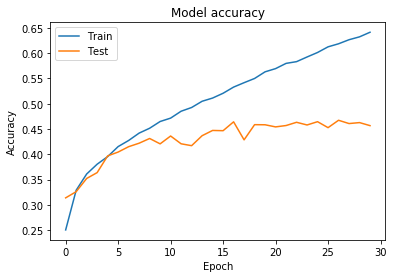

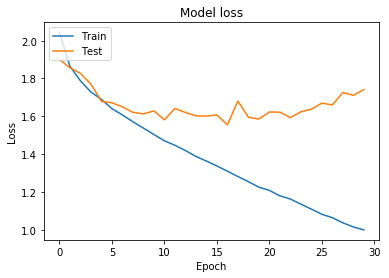

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we can see from the second graph, test loss first decreases till 10 epochs. Then it stays constant for a while and then it increases. This means we are overfitting our model.

Training accuracy increases as expected.

to reduce overfitting lets reduce number of hidden layers

In [43]:
model_7 = tf.keras.models.Sequential()
model_7.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_7.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model_7.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
model_7.add(tf.keras.layers.Dense(160, activation=tf.nn.relu))
model_7.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_7.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

model_7.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [44]:
history = model_7.fit(x_train, y_train, validation_split=0.20, epochs=30)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 15s 382us/step - loss: 2.1849 - acc: 0.1985 - f1_score: 3.1375e-04 - val_loss: 2.0913 - val_acc: 0.2433 - val_f1_score: 0.0012
Epoch 2/30
40000/40000 [==============================] - 15s 367us/step - loss: 2.0325 - acc: 0.2684 - f1_score: 0.0234 - val_loss: 1.9862 - val_acc: 0.2820 - val_f1_score: 0.0554
Epoch 3/30
40000/40000 [==============================] - 15s 368us/step - loss: 1.9354 - acc: 0.3079 - f1_score: 0.0702 - val_loss: 1.8922 - val_acc: 0.3254 - val_f1_score: 0.1146
Epoch 4/30
40000/40000 [==============================] - 15s 366us/step - loss: 1.8449 - acc: 0.3435 - f1_score: 0.1343 - val_loss: 1.8433 - val_acc: 0.3386 - val_f1_score: 0.1342
Epoch 5/30
40000/40000 [==============================] - 16s 392us/step - loss: 1.7788 - acc: 0.3655 - f1_score: 0.1791 - val_loss: 1.7857 - val_acc: 0.3602 - val_f1_score: 0.1947
Epoch 6/30
40000/40000 [=================

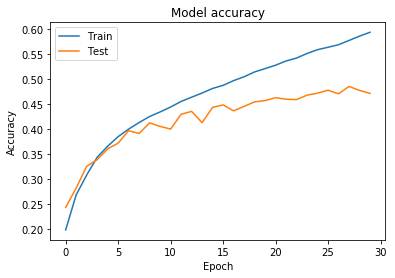

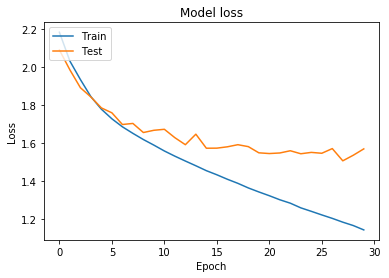

In [45]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

comment -- reduced overfitting

to further reduce lets reduce number of hidden layers.

In [51]:
# with reduced number of hidden layers
model_8 = tf.keras.models.Sequential()
model_8.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_8.add(tf.keras.layers.Dense(3072, activation=tf.nn.relu))
model_8.add(tf.keras.layers.Dense(1024, activation=tf.keras.activations.linear))
model_8.add(tf.keras.layers.Dense(3072, activation=tf.nn.relu))
model_8.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

model_8.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [52]:
history = model_8.fit(x_train, y_train, validation_split=0.20, epochs=8)

Train on 40000 samples, validate on 10000 samples
Epoch 1/8
40000/40000 [==============================] - 116s 3ms/step - loss: 1.9624 - acc: 0.2914 - f1_score: 0.1012 - val_loss: 1.8780 - val_acc: 0.3247 - val_f1_score: 0.1826
Epoch 2/8
40000/40000 [==============================] - 118s 3ms/step - loss: 1.8003 - acc: 0.3560 - f1_score: 0.2126 - val_loss: 1.7805 - val_acc: 0.3642 - val_f1_score: 0.2113
Epoch 3/8
40000/40000 [==============================] - 110s 3ms/step - loss: 1.7316 - acc: 0.3862 - f1_score: 0.2760 - val_loss: 1.7590 - val_acc: 0.3721 - val_f1_score: 0.1578
Epoch 4/8
40000/40000 [==============================] - 111s 3ms/step - loss: 1.6732 - acc: 0.4038 - f1_score: 0.3291 - val_loss: 1.7582 - val_acc: 0.3634 - val_f1_score: 0.3446
Epoch 5/8
40000/40000 [==============================] - 111s 3ms/step - loss: 1.6317 - acc: 0.4190 - f1_score: 0.3668 - val_loss: 1.8019 - val_acc: 0.3711 - val_f1_score: 0.4929
Epoch 6/8
40000/40000 [==============================] 

In [53]:
history = model_8.fit(x_train, y_train, validation_split=0.20, epochs=22)

Train on 40000 samples, validate on 10000 samples
Epoch 1/22
40000/40000 [==============================] - 112s 3ms/step - loss: 1.4658 - acc: 0.4766 - f1_score: 0.5263 - val_loss: 1.5785 - val_acc: 0.4537 - val_f1_score: 0.5569
Epoch 2/22
40000/40000 [==============================] - 111s 3ms/step - loss: 1.4265 - acc: 0.4919 - f1_score: 0.5607 - val_loss: 1.5752 - val_acc: 0.4454 - val_f1_score: 0.5687
Epoch 3/22
40000/40000 [==============================] - 111s 3ms/step - loss: 1.3925 - acc: 0.5051 - f1_score: 0.5893 - val_loss: 1.5680 - val_acc: 0.4476 - val_f1_score: 0.5250
Epoch 4/22
40000/40000 [==============================] - 105s 3ms/step - loss: 1.3572 - acc: 0.5132 - f1_score: 0.6229 - val_loss: 1.5724 - val_acc: 0.4553 - val_f1_score: 0.6195
Epoch 5/22
40000/40000 [==============================] - 112s 3ms/step - loss: 1.3211 - acc: 0.5274 - f1_score: 0.6605 - val_loss: 1.5697 - val_acc: 0.4518 - val_f1_score: 0.6680
Epoch 6/22
40000/40000 [==========================

In [54]:
test_loss, test_acc, test_f1 = model_8.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)
print(test_f1)

10000/10000 [==============================] - 4s 435us/step
1.9286107978820801
0.472
0.9813462698412695


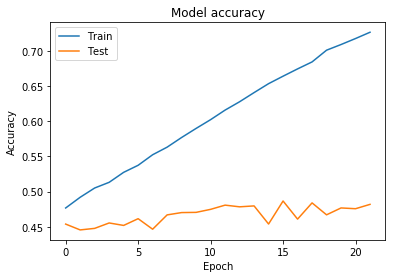

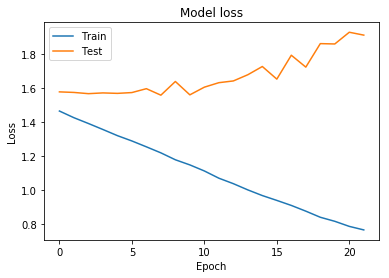

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we can see this model is heavily overfits. Therefore, we can say that model_7 is better out of all the models we tested. :)